<a href="https://colab.research.google.com/github/ralph27/Matplotlib-visualization/blob/master/Linear_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression From Scratch Using Gradient Descent**
© 2024, Zaka AI, Inc. All Rights Reserved.

---
**Objectives:** The goal of this notebook is to build from scratch the Gradient Descent algorithm and apply it on few examples that we solved manually during the course, and finally explore some interesting behaviors of Gradient Descent.





#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Gradient Descent

The form of the line equation that we take is y=a0+a1x

In [ ]:
def Gradient_descent (x, y, learning_rate, nb_iterations, initial_a0, initial_a1):
  n = x.shape [0] #number of points
  a0 = initial_a0
  a1 = initial_a1

  for i in range (nb_iterations):
    y_pred = --- # define function form

    a0_der = --- # derivative of cost with respect to a0
    a1_der = --- # derivative of cost with respect to a1

    a0 = --- # GD update equation for a0
    a1 = --- # GD update equation for a1

  return a0, a1

#Example using GD

We will use the same example that we solved in the course using Normal Equations.

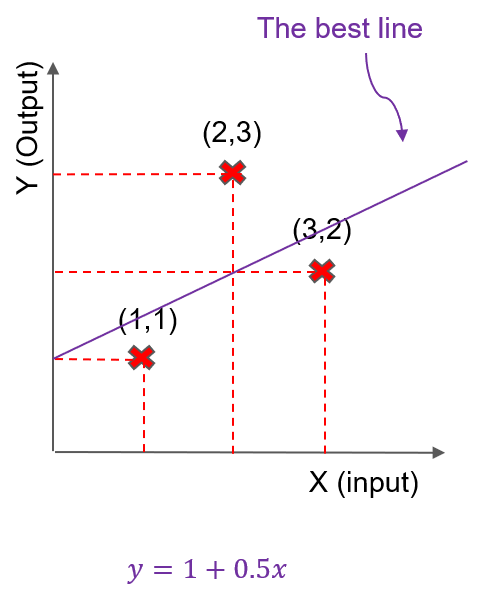




In [ ]:
x = np.array([1, 2, 3])
y = np.array([1, 3, 2])

initial_a0 = 0.5
initial_a1 = -2

learning_rate = 0.01

nb_iterations = 10000

a0, a1 = Gradient_descent(x, y, learning_rate, nb_iterations, initial_a0, initial_a1)

print ("Equation is: ", a0,"+",a1,"x")

We see that we obtained the same result from our lesson!

##Visualize what was done by Gradient Descent

Now we need to visualize how GD changed the parameters of the Line from being random to be the ones that best fit the data points that we have.


In [ ]:
x_axis = np.arange(1,3,0.01)
y_initial = initial_a0 + initial_a1 * x_axis
y_final = a0 + a1 * x_axis

plt.scatter(x,y)
plt.plot(x_axis, y_initial, 'r', label = 'Before Gradient Descent')
plt.plot(x_axis, y_final, 'g', label = 'After Gradient Descent' )
plt.legend()
plt.show()

#Let Gradient Descent Guess

Now we will let Gradient Descent guess the equation of a line that we're thinking about.

What we do is simply take some points that we know are on the same line we desire to achieve as an outcome of GD, give them to GD, and it will find the best line which minimizes the error (which in this case should be the line that we defined at the beginning.)

<br>
Let's say the equation of the line that we want GD to guess is:  **y = 3 + 2 x**

We give it points on that line, and let it figure it out as we see below:

In [ ]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([3, 5, 7, 9, 11])

initial_a0 = 0.5
initial_a1 = -2

learning_rate = 0.01

nb_iterations = 10000

a0, a1 = Gradient_descent(x,y,learning_rate, nb_iterations, initial_a0, initial_a1)

print ("Equation is: ", a0,"+",a1,"x")

Let's admit it! Gradient Descent is good at this! :D

##Visualization

Here we can see again what GD did.

In [ ]:
x_axis = np.arange(0,4,0.01)
y_initial = initial_a0 + initial_a1 * x_axis
y_final = a0 + a1 * x_axis

plt.scatter(x,y)
plt.plot(x_axis, y_initial, 'r', label = 'Before Gradient Descent')
plt.plot(x_axis, y_final, 'g', label = 'After Gradient Descent' )
plt.legend()
plt.show()

#Weight vs Height Problem

We are now going to try the example we saw in the lessons to see some new aspects of Gradient Descent that we did not know about. <br>

We have data about the height and weight for different people, and we want to learn a linear realtion between weight and height to be able to make future predictions based on that relation.

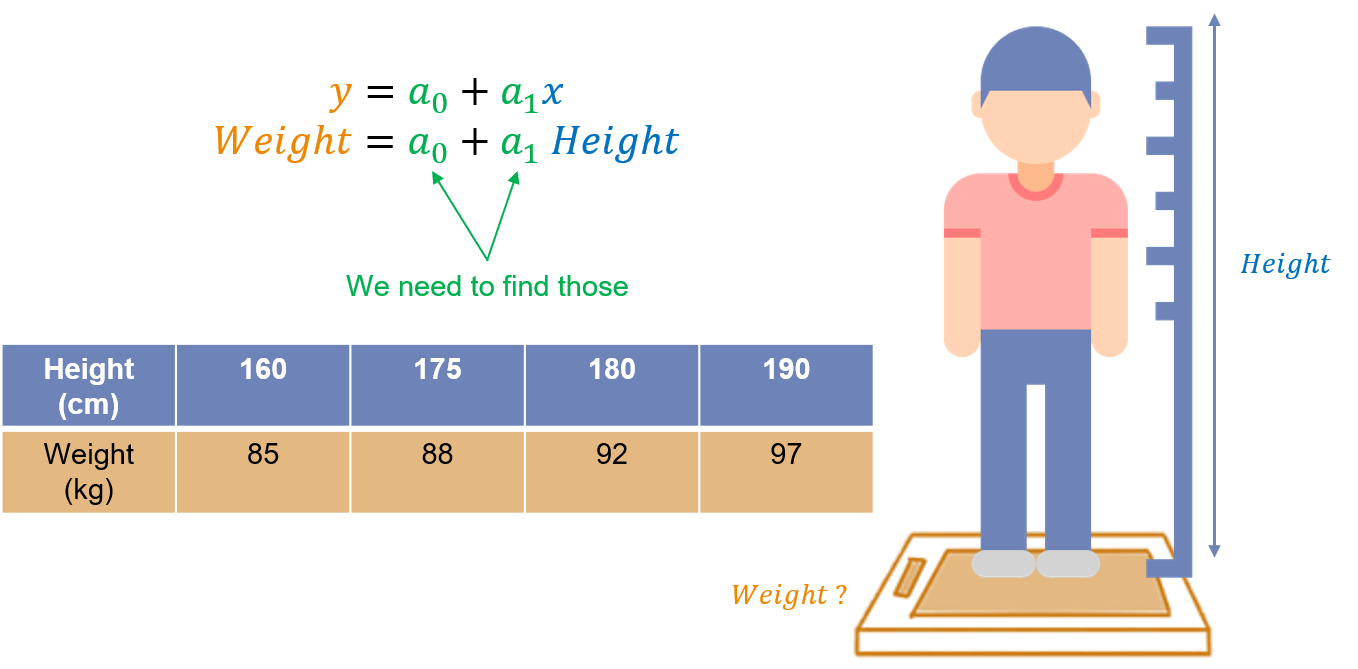

First, let's run GD for only one iteration, with the same parameters that we took in the course to make sure that our results were correct.

In [ ]:
Height = np.array([160, 175, 180, 190])
Weight = np.array([85, 88, 92, 97])

# using same initial guess as our lesson in the course (this can impact the result greatly!)
initial_a0 = 0.2
initial_a1 = 0.2

learning_rate = 0.01

nb_iterations = 1

a0, a1 = Gradient_descent(Height, Weight, learning_rate, nb_iterations, initial_a0, initial_a1)

print ("Equation is: Weight=", a0,"+",a1,"Height")

We obtained the same equation that we derived in the course. Now let's run this for several iterations.

In [ ]:
nb_iterations = 1000

a0, a1 = Gradient_descent(Height, Weight, learning_rate, nb_iterations, initial_a0, initial_a1)

print ("Equation is: Weight=", a0,"+",a1,"Height")

We obtained NaN (not a number) values, which is mainly caused by dividing by 0. <br>

If we look at the function, we do divide by n, but not by zero ... We can deduce that this is mainly because the numerator is MUCH LARGER than n, and this is why we obtained such a result.

**To deal with that, we need to work with smaller numbers. But HOW ??** <br>

Hopefully you guessed right! Normalizing the data is a great choice here!

In [ ]:
# Normalize the data
new_Height = ---
new_Weight = ---

initial_a0 = 0.2
initial_a1 = 0.2

learning_rate = 0.001

nb_iterations = 1000

a0, a1 = Gradient_descent(new_Height, new_Weight, learning_rate, nb_iterations, initial_a0, initial_a1)

print ("Equation is: Weight=", a0,"+",a1,"Height")

But remember here that the Height is no longer the true/actual height of the person. It's the height divided by the max that we calculated. And the same thing applies for the Weight.

It's important to keep this in mind so we can:
  

1.   Feed new data samples that we will receive with the original. We need to make sure we also divide them by **the same max** of the Height from our dataset.
2.   Revert back to the original range when we want to generate a prediction for our end user (that is, we need to multiply the max Weight from our dataset by the model's output prediction.)

In [ ]:
x_axis = np.arange(np.min(new_Height),np.max(new_Height),0.01)
y_initial = initial_a0 + initial_a1 * x_axis
y_final = a0 + a1 * x_axis

plt.scatter(new_Height,new_Weight)
plt.plot(x_axis, y_initial, 'r', label = 'Before Gradient Descent')
plt.plot(x_axis, y_final, 'g', label = 'After Gradient Descent' )
plt.legend()
plt.show()

Let's take an example! We want to know the Weight of a person of Height 165 cm based on the model we obtained.
* First, we divide this height by the maximum that we had used above.
* Next, we feed this height to our model in order to predict and multiply the output by the Weight maximum that we had used above.



In [ ]:
h = 165;
h = --- # process height before feeding to model

#Calculate the prediction of the Weight (Recall: this is normalized)
w = a0 + a1* h

#Calculate the Real Weight
w = ---

print ("The Weight of a person with height 165 cm is ", w, " kg based on our model")